In [11]:
import numpy as np 
import numpy.random as rand 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import signal 
import scipy.stats as stats 
from statsmodels.tsa import api as tsa 
%matplotlib inline 

In [12]:
y=np.array([20.89,20.11,16.41,18.95,21.43,16.54,11.55,14.39,20.66,15.31,9.34,11.39,11.34,10.07,5.95,4.59,8.74,9.96,3.03,3.17,4.45,4.06,0.16,1.52])
print(len(y))

24


[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913
 0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087
 0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043
 0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]


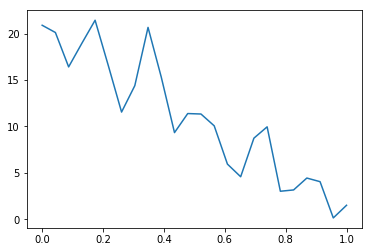

In [13]:
t=np.linspace(0,1,24)
print(t)
plt.plot(t,y)
plt.show()

In [14]:
A=np.vstack([t,np.ones(len(t))]).T
B = np.linalg.lstsq(A,y)
print(B)

(array([-20.2063    ,  21.10356667]), array([148.78062694]), 2, array([5.51915835, 1.30874143]))


c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


[-20.2063      21.10356667]
-20.206300000000002 21.103566666666666


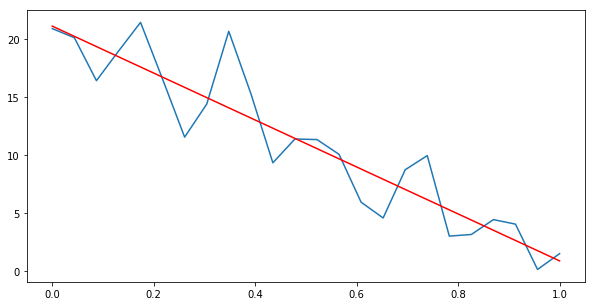

In [15]:
B = B[0] # take the coefficients β 
print(B) 
print(B[0],B[1])
plt.figure(figsize = (10, 5)) 
plt.plot(t, y)     # plot time series data 
plt.plot(t,B[1]+B[0]* t , 'r')  # plot the trend for it plt.show() 

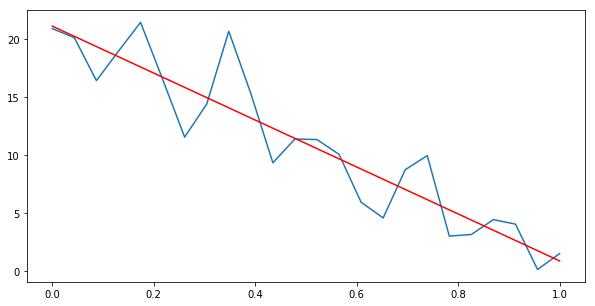

In [16]:
bb = np.polyfit(t, y, 1)  # polynomial of first order = linear 
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, bb[1] + bb[0]*t, 'r') # Note! Coef. β in reverse order 
plt.show() 

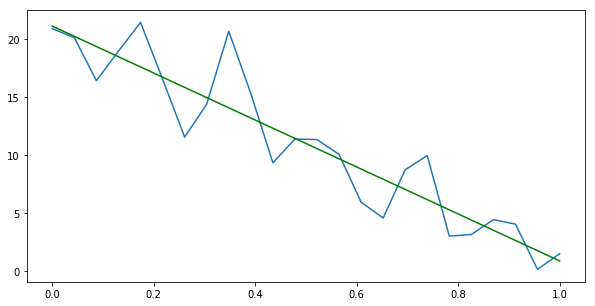

In [17]:
p = np.poly1d(bb) # create a polynomial class with your coef. 
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
# estimate a polynomial curve in corresponding time points 
plt.plot(t, p(t), 'g')  
plt.show()

LinregressResult(slope=-20.206300000000006, intercept=21.10356666666667, rvalue=-0.9254413356682853, pvalue=9.633240081001592e-11, stderr=1.7637651924908868)


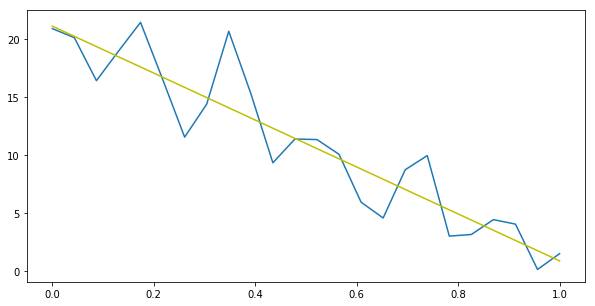

In [18]:
out = stats.linregress(t, y) 
print(out)  # print coefficients and statistic of regression 
plt.figure(figsize = (10, 5)) 
plt.plot(t, y)  # plot the data and the trend 
plt.plot(t, out.intercept + out.slope*t, 'y') 
plt.show()

[ 21.10356667 -20.2063    ]
[[ 1.05949839 -1.55543382]
 [-1.55543382  3.11086767]]


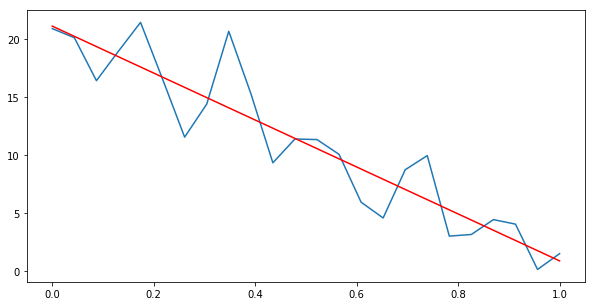

In [19]:
def func(t, b0, b1): # define the form of trend 
    return b0 + b1 * t # linear trend with two parameters from time 
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(func, t, y)  # fit the data to our function 
print(popt) # here are the coefficients b0 & b1 of trend 
print(pcov) # here is the covariance matrix of fit errors
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, popt[0] + popt[1]*t, 'r') 
plt.show() 

[-20.2063]
21.103566666666666
0.8564416657634997


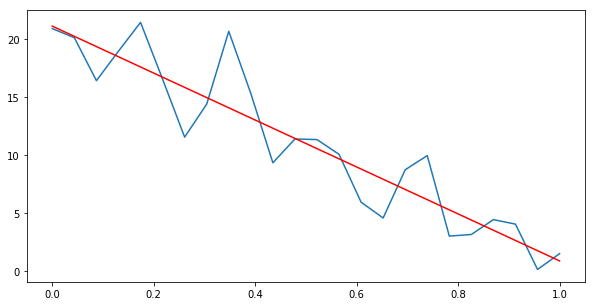

In [20]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(t.reshape(-1,1), y) 
print(reg.coef_)   # here is the linear coefficient b1 
print(reg.intercept_) # and here is the displacement b0 
print(reg.score(t.reshape(-1,1), y))  # and here is the value of R^2 score, close to 1.0 is the better 
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, reg.intercept_ + reg.coef_*t, 'r') 
plt.show() 

[ 21.10356667 -20.2063    ]


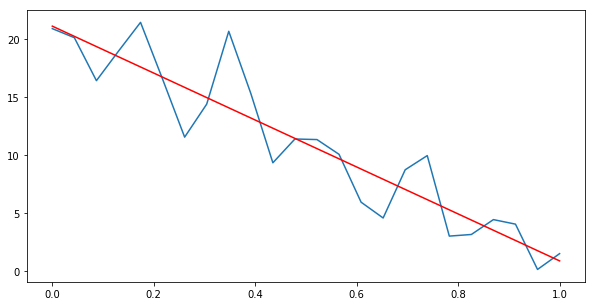

In [21]:
import statsmodels.api as sm 
x_ = sm.add_constant(t.reshape(-1,1)) # linear model   01 tt     
smm = sm.OLS(y, x_)  # solve by Ordinary Least Squares = OLS method 
res = smm.fit()   # fit the parameters of model to data 
print(res.params)  # receive the results 
y1=res.params[0] + res.params[1]*t
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t,y1 , 'r') 
plt.show() 

[ -1.11867657 -19.08762343  20.92522692]


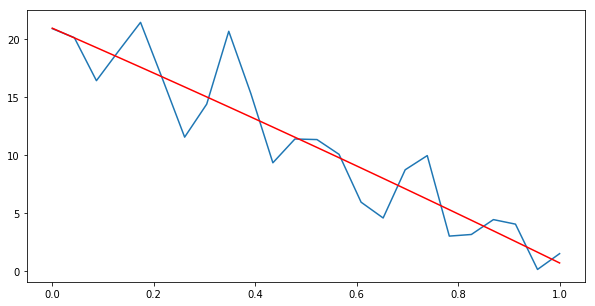

In [22]:
b = np.polyfit(t, y, 2) 
print(b)
y2 =b[0] * t ** 2 + b[1] * t+ b[2]
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, y2, 'r') 
plt.show() 

[ 20.92522692 -19.08762343  -1.11867657]


c:\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


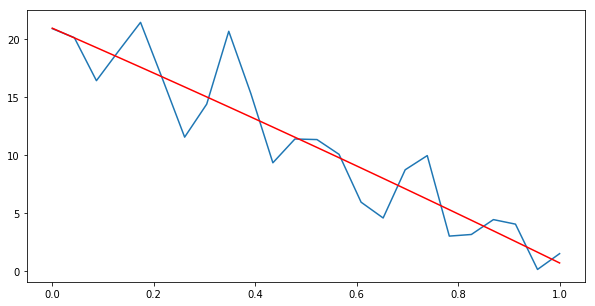

In [23]:

A = np.vstack([t**0, t**1, t**2]).T
B = np.linalg.lstsq(A,y)
B = B[0] # take the coefficients β 
print(B) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, y)     # plot time series data 
plt.plot(t, B[0] + B[1] * t+B[2] *(t**2)   , 'r')  # plot the trend for it plt.show() 

[ 20.92522701 -19.08762401  -1.11867598]
[[  2.25598088  -8.82526566   7.19791138]
 [ -8.82526566  48.4052407  -45.15053195]
 [  7.19791138 -45.15053195  45.15053169]]


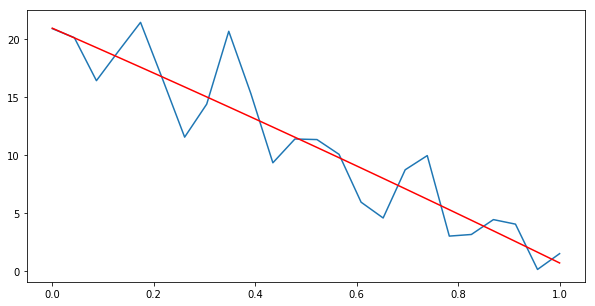

In [24]:
def func(t, b0, b1,b2): # define the form of trend 
    return b0 + b1 * t+b2*(t**2 )# linear trend with two parameters from time 
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(func, t, y)  # fit the data to our function 
print(popt) # here are the coefficients b0 & b1 of trend 
print(pcov) # here is the covariance matrix of fit errors
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, popt[0] + popt[1]*t+popt[2]*(t**2), 'r') 
plt.show() 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
-19.08762342657343
-1.1186765734265678
20.92522692307692


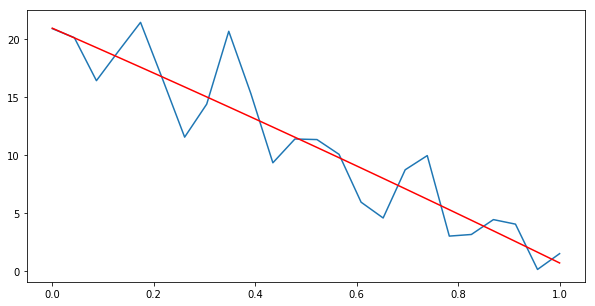

In [25]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(np.vstack((t,t**2)).T, y) 
print(reg)
print(reg.coef_[0])   
print(reg.coef_[1])
print(reg.intercept_) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, reg.intercept_ + reg.coef_[0]*t + reg.coef_[1]*(t**2), 'r') 
plt.show() 

[ 14.19159074 -22.40606268 -10.75241125  20.30551852]


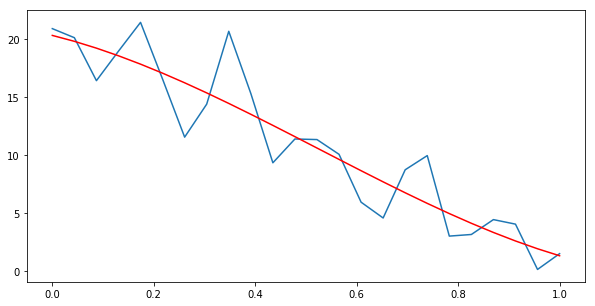

In [26]:
b = np.polyfit(t, y, 3) 
print(b)
y3= b[0] * t ** 3 + b[1] * t ** 2 + b[2] * t + b[3]
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, y3, 'r') 
plt.show() 

[ 20.3055178  -10.75240258 -22.40608373  14.19160434]
[[    3.62687602   -26.51887983    51.85452357   -29.60488761]
 [  -26.51887983   283.95365311  -644.00242999   398.19215164]
 [   51.85452357  -644.00242999  1572.13491155 -1016.94714411]
 [  -29.60488761   398.19215164 -1016.94714411   677.96476803]]


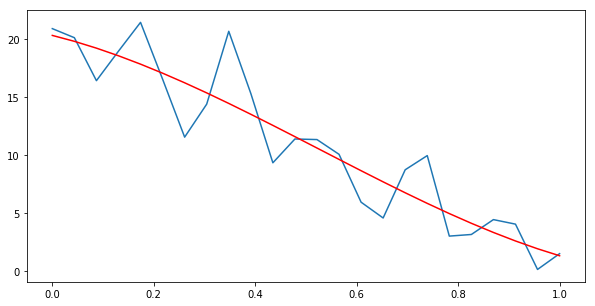

In [27]:
def func(t, b0, b1,b2,b3): # define the form of trend 
    return b0 + b1 * t+b2*(t**2 )+b3*(t**3 )# linear trend with two parameters from time 
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(func, t, y)  # fit the data to our function 
print(popt) # here are the coefficients b0 & b1 of trend 
print(pcov) # here is the covariance matrix of fit errors
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, popt[0] + popt[1]*t+popt[2]*(t**2)+popt[3]*(t**3), 'r') 
plt.show() 

[ 20.30551852 -10.75241125 -22.40606268  14.19159074]


c:\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


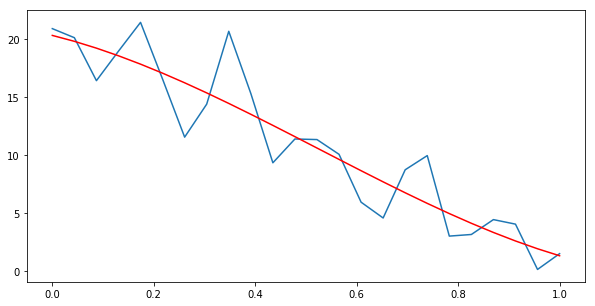

In [28]:
# A=np.vstack([t,np.ones(len(t))]).T
A = np.vstack([t**0, t**1, t**2,t**3]).T
B = np.linalg.lstsq(A,y)
B = B[0] # take the coefficients β 
print(B) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, y)     # plot time series data 
plt.plot(t, B[0] + B[1] * t+B[2] *(t**2) +B[3]*(t**3)  , 'r')  # plot the trend for it plt.show() 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
-10.752411249244725
-22.406062678062746
14.191590736424269
20.30551851851856


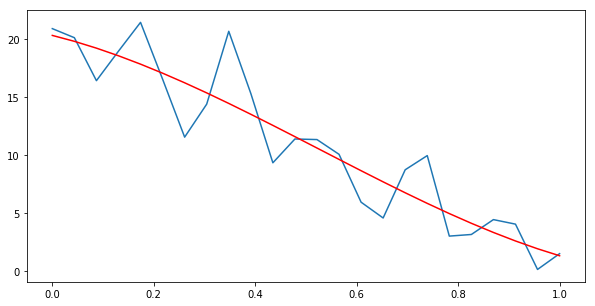

In [29]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(np.vstack((t,t**2,t**3)).T, y) 
print(reg)
print(reg.coef_[0])   
print(reg.coef_[1])
print(reg.coef_[2])
print(reg.intercept_) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t, reg.intercept_ + reg.coef_[0]*t + reg.coef_[1]*(t**2)+reg.coef_[2]*(t**3), 'r') 
plt.show() 

[22.992297   -1.69950853]
[[ 2.75096425 -0.25922618]
 [-0.25922618  0.04658092]]


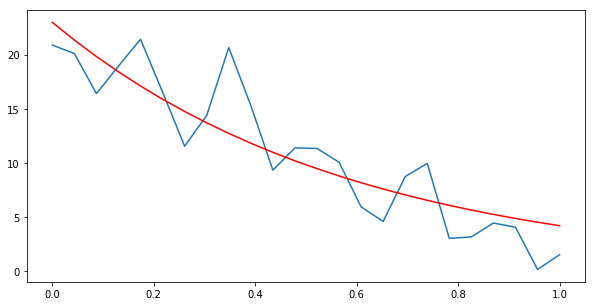

In [30]:
def func(t, b0, b1): # define the form of trend 
    return b0*np.exp(b1 * t) # linear trend with two parameters from time 
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(func, t, y)  # fit the data to our function 
print(popt) # here are the coefficients b0 & b1 of trend 
print(pcov) # here is the covariance matrix of fit errors
y4=popt[0]*np.exp(popt[1]*t)
plt.figure(figsize = (10, 5)) 
plt.plot(t, y) 
plt.plot(t,y4 , 'r') 
plt.show() 

[0.  0.2 0.4 0.6 0.8]
-2.8483240583242537


c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


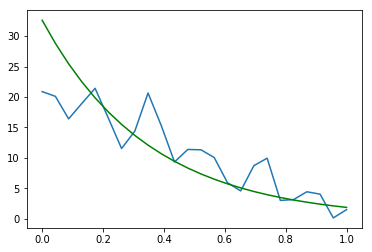

In [43]:
fp = lambda a,p,x:a*np.exp(p*x) 
A= np.linalg.lstsq(np.vstack([t, np.ones(len(t))]).T,np.log(y))[0]
p=A[0]
a=np.exp(A[1])
plt.figure() 
plt.plot(t, y ) 
plt.plot(t, fp(a, p,t), 'g-')
plt.show() 

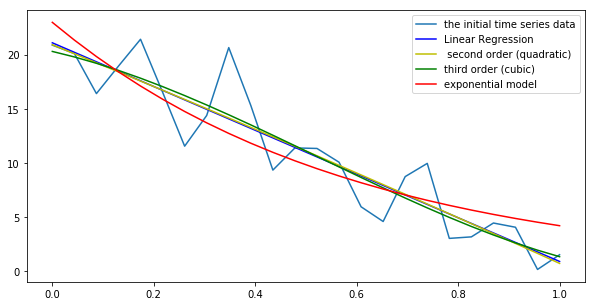

In [33]:
plt.figure(figsize = (10, 5)) 
plt.plot(t, y,label="the initial time series data") 
plt.plot(t, y1,'b',label="Linear Regression ") 
plt.plot(t, y2,'y',label=" second order (quadratic) ") 
plt.plot(t, y3,'g',label="third order (cubic)") 
plt.plot(t,y4 ,'r',label="exponential model") 
plt.legend()
plt.show() 

In [34]:
def smooth(x, window_len):    
    if window_len<3:        
        return x    
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]    
    w=np.ones(window_len, 'd')   
    y=np.convolve(w/w.sum(), s, mode='same')    
    return y[window_len:-window_len+1] 

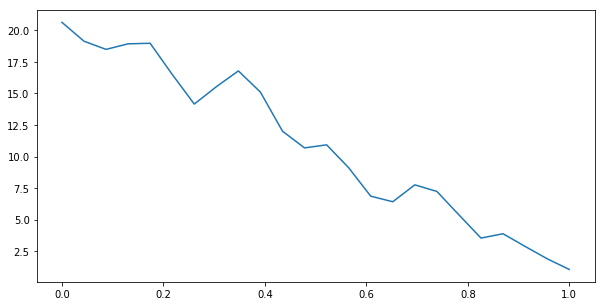

In [35]:
Smoothed_data = smooth(y, 3) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Smoothed_data) 
plt.show()

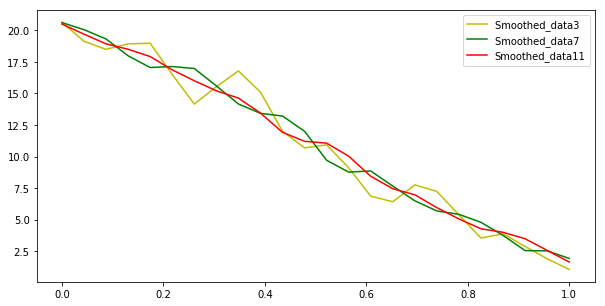

In [36]:
Smoothed_data3 = smooth(y, 3) 
Smoothed_data7 = smooth(y, 7) 
Smoothed_data11 = smooth(y, 11) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Smoothed_data3,'y',label="Smoothed_data3 ") 
plt.plot(t, Smoothed_data7 ,'g',label="Smoothed_data7 ") 
plt.plot(t,Smoothed_data11 ,'r',label="Smoothed_data11") 
plt.legend()
plt.show()

24


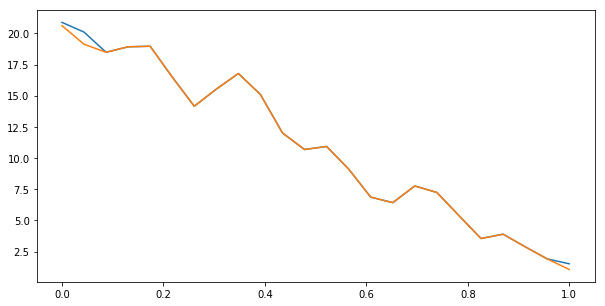

In [37]:
tao=[]
for i in range(24):
    if i>1 and i<23:
        taox=1/3*(y[i-1]+y[i]+y[i+1])
        tao.append(taox)
    else:
        taox=y[i]
        tao.append(taox)
print(len(tao))
plt.figure(figsize = (10, 5)) 
plt.plot(t, tao) 
plt.plot(t,Smoothed_data3)
plt.show()

24


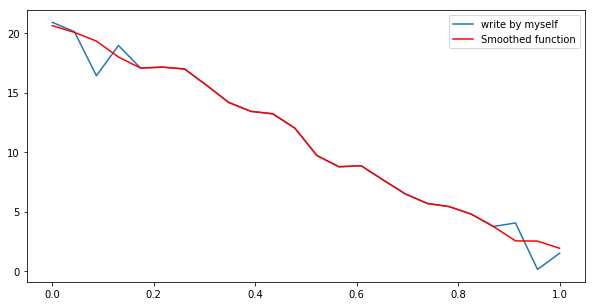

In [38]:
tao=[]
for i in range(24):
    if i>3 and i<21:
        taox=1/7*(y[i-3]+y[i-2]+y[i-1]+y[i]+y[i+1]+y[i+2]+y[i+3])
        tao.append(taox)
    else:
        taox=y[i]
        tao.append(taox)
print(len(tao))
plt.figure(figsize = (10, 5)) 
plt.plot(t, tao,label="write by myself") 
plt.plot(t, Smoothed_data7 ,'r',label="Smoothed function") 
plt.legend()
plt.show()

[20.89       20.11       19.         18.985      19.7185     18.76495
 16.600465   15.9373255  17.35412785 16.74088949 14.52062265 13.58143585
 12.9090051  12.05730357 10.2251125   8.53457875  8.59620512  9.00534359
  7.21274051  5.99991836  5.53494285  5.09246     3.612722    2.9849054 ]


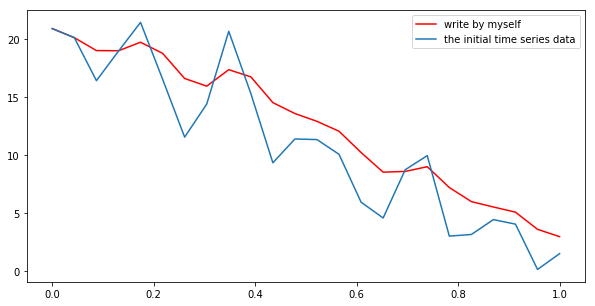

In [48]:
a=0.3
taox=np.zeros(24)
taox[0]=y[0]
for i in range(24):
    if i>1:
        taox[i]=(1-a)*taox[i-1]+a*y[i]
    else:
        taox[i]=y[i]
print(taox)
plt.figure(figsize = (10, 5)) 
plt.plot(t, taox,'r',label="write by myself") 
plt.plot(t, y,label="the initial time series data") 
plt.legend()
plt.show()